# EMINST - CNN Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
from torchvision.datasets import EMNIST
from torchvision.transforms import ToTensor

train = EMNIST(root='data', split='byclass', download=True, transform=ToTensor())
test = EMNIST(root='data', split='byclass', train=False, download=True, transform=ToTensor())

100%|██████████| 561753746/561753746 [00:24<00:00, 23368235.58it/s]


Extracting data/EMNIST/raw/gzip.zip to data/EMNIST/raw


The EMNIST dataset is divided into several splits, each representing a different type of classification task. The byclass split includes a balanced set of 814,255 characters (both digits and uppercase/lowercase letters) divided into 62 classes (10 digits and 52 letters).

In [ ]:
labels = [label for _, label in train]

# Determine the number of unique classes
num_classes = len(np.unique(labels))
print(f'Number of classes: {num_classes}')

Number of classes: 62


In [ ]:
def convert_to_tf_dataset(emnist_dataset):
    images = []
    labels = []

    for img, label in emnist_dataset:
        images.append(img.numpy().reshape(-1))  # Flatten the image
        labels.append(label)  # Directly append the integer label

    images = np.array(images)
    labels = np.array(labels)

    # Normalize images
    images = images / 255.0

    # Convert labels to one-hot encoding
    num_classes = len(np.unique(labels))
    labels = to_categorical(labels, num_classes=num_classes)

    return tf.data.Dataset.from_tensor_slices((images, labels))

Convert PyTorch EMNIST dataset to TensorFlow format and apply Normalization and one hot encoding on them

In [ ]:
train_dataset = convert_to_tf_dataset(train)
test_dataset = convert_to_tf_dataset(test)

Build the CNN model

In [ ]:
model = tf.keras.Sequential([
    layers.Reshape(target_shape=(28, 28, 1), input_shape=(784,)),  # Adjust input shape based on EMNIST image size
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(62, activation='softmax')  # Adjust the number of classes based on EMNIST dataset
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset.batch(64), epochs=5)

Epoch 1/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 658s 60ms/step - accuracy: 0.5125 - loss: 1.7994
Epoch 2/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 660s 61ms/step - accuracy: 0.8242 - loss: 0.5100
Epoch 3/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 672s 60ms/step - accuracy: 0.8397 - loss: 0.4545
Epoch 4/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 647s 59ms/step - accuracy: 0.8460 - loss: 0.4316
Epoch 5/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 686s 60ms/step - accuracy: 0.8494 - loss: 0.4183


Evaluating the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset.batch(64))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1818/1818 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8497 - loss: 0.4226
Test Loss: 0.41918885707855225
Test Accuracy: 0.8495998382568359


In [ ]:
history_dict = history.history

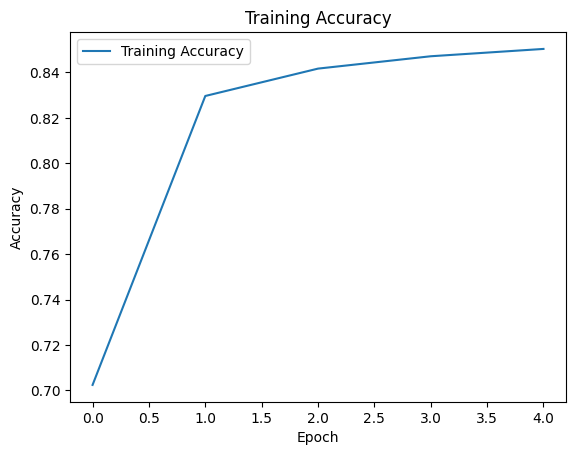

In [ ]:
# Accuracy Plot

plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

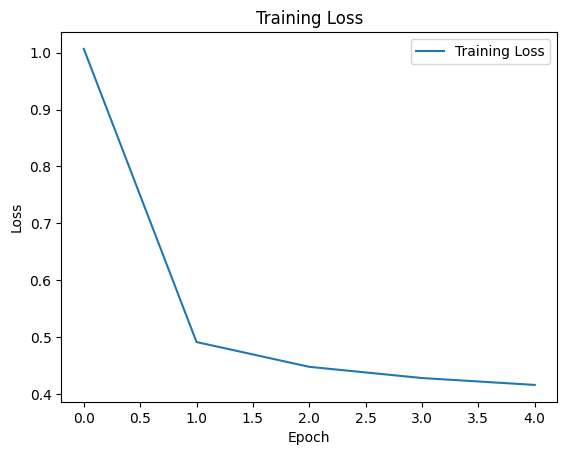

In [ ]:
# Loss Plot
plt.plot(history_dict['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
def get_pred(dataset):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        predictions = model.predict(images)
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

In [ ]:
y_true, y_pred = get_pred(test_dataset.batch(64))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.6729    0.8271    0.7421      5778
           1     0.6797    0.9016    0.7751      6330
           2     0.9432    0.9683    0.9556      5869
           3     0.9904    0.9814    0.9859      5969
           4     0.9333    0.9808    0.9564      5619
           5     0.9708    0.8699    0.9176      5190
           6     0.9743    0.9625    0.9683      5705
           7     0.9817    0.9868    0.9842      6139
           8     0.9821    0.9437    0.9625      5633
           9     0.9272    0.9625    0.9445      5686
          10     0.8850    0.9567    0.9195      1062
          11     0.7929    0.9336    0.8575       648
          12     0.7514    0.9540    0.8406      1739
          13     0.8552    0.8793    0.8671       779
          14     0.9739    0.8766    0.9227       851
          15     0.7544    0.9472    0.8399      1440
          16     0.8949    0.8568    0.8754       447
          17     0.9095    

# ANN

1) Flattening: Convert the image into a long list of pixel values. For example, a 28x28 image becomes a vector with 784 numbers.

2) Network Layers:

- > Input Layer: Each pixel value is fed into the network.
- > Hidden Layers: Neurons in these layers process the pixel values and learn patterns. Each neuron is connected to every neuron in the next layer.
- > Output Layer: Produces probabilities for each possible class (e.g., different letters or numbers).

3) Training:

- > Forward Propagation: Compute the output probabilities from the input image.
- > Loss Function: Measures how far off the network's predictions are from the actual class.
- >
Backpropagation: Adjusts the weights in the network to improve accuracy.


# ANN vs CNN

1) Feature Extraction:

-> ANNs: Do not inherently extract spatial features; they treat input data as a flat vector.

-> CNNs: Use convolutional and pooling layers to automatically extract and learn spatial features from images.

2) Parameter Efficiency:

-> ANNs: Have a large number of parameters when dealing with high-dimensional inputs (e.g., images), leading to potential overfitting and inefficiency.

-> CNNs: Use shared weights in convolutional filters, making them more parameter-efficient and effective at handling high-dimensional data.

3)Handling Spatial Data:

-> ANNs: May struggle with spatial relationships in images as they do not exploit the spatial structure.

-> CNNs: Specifically designed to handle spatial relationships, making them more effective for image recognition tasks.

# Justification for CNN

CNNs are specifically designed for image data, leveraging convolutional and pooling layers to efficiently learn hierarchical features, manage parameters, and handle translation invariance. This makes CNNs superior for tasks involving image recognition and understanding.